In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
dataset_path = r"D:\My applicatios\MCQ\MYdataset"  # Replace with your dataset folder path
model_save_path = "simple_answer_classification_model_no_aug3.h5"  # Path to save the model

In [3]:
# Parameters
img_width, img_height = 128, 128  # Resize images to 128x128
batch_size = 32
epochs = 20
learning_rate = 0.0005

In [4]:
# ===== DATA PREPARATION =====
# Load dataset without augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize images
    validation_split=0.2  # Split 20% for validation
)


In [5]:
# Training data
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True,
)
# عرض الفئات والتسميات المرتبطة بها
print("Class labels in the dataset:")
print(train_data.class_indices)


Found 811 images belonging to 4 classes.
Class labels in the dataset:
{'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [6]:
# Validation data
val_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
     shuffle=False
)
# عرض الفئات والتسميات المرتبطة بها
print("Class labels in the dataset:")
print(val_data.class_indices)



Found 202 images belonging to 4 classes.
Class labels in the dataset:
{'A': 0, 'B': 1, 'C': 2, 'D': 3}


In [7]:
# ===== MODEL ARCHITECTURE =====
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.4),  # Regularization to reduce overfitting
    Dense(4, activation="softmax")  # Number of classes: A, B, C, D
])


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# ===== MODEL COMPILATION =====
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [9]:
# ===== MODEL TRAINING =====
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/20


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.3194 - loss: 1.3670 - val_accuracy: 0.7574 - val_loss: 0.8038
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.7720 - loss: 0.5842 - val_accuracy: 1.0000 - val_loss: 0.0564
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.9497 - loss: 0.1608 - val_accuracy: 1.0000 - val_loss: 0.0288
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9576 - loss: 0.0874 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9890 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9938 - loss: 0.0373 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9976 - loss: 0.0166 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9988 - loss: 0.0124 - val_accuracy: 1.0000 - val_

In [10]:
# ===== EVALUATE THE MODEL =====
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9988 - loss: 0.0021    
Validation Loss: 0.0068, Validation Accuracy: 0.9950


In [11]:
from sklearn.metrics import classification_report

# Generate predictions
y_true = val_data.classes  # True labels
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=list(val_data.class_indices.keys()))
print(report)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        51
           B       1.00      1.00      1.00        50
           C       0.98      1.00      0.99        50
           D       1.00      0.98      0.99        51

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



In [12]:
# الآن يمكنك حساب المقاييس
print("y_true:",y_true )
print("y_pred_classes:",y_pred_classes )

y_true: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
y_pred_classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3]


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score ,classification_report

# تحويل القيم المتوقعة إلى التصنيفات النهائية
y_pred_classes = np.argmax(y_pred, axis=1)

# استخدام y_true مباشرة إذا كانت بالفعل مصفوفة من التصنيفات
y_true_classes = y_true  # لا حاجة إلى np.argmax إذا كانت y_true ذات بعد واحد

# إنشاء مصفوفة الالتباس
cm = confusion_matrix(y_true_classes, y_pred_classes)


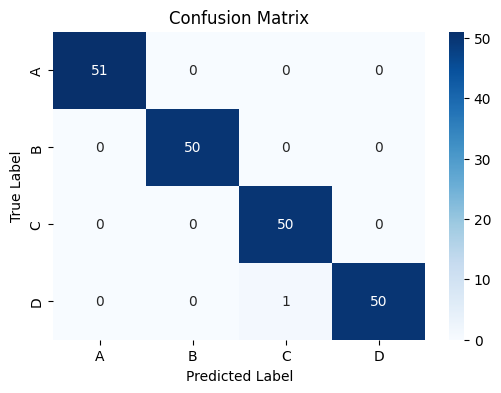

In [14]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
# الآن يمكنك حساب المقاييس
print("Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("Precision:", precision_score(y_true_classes, y_pred_classes, average="weighted"))
print("Recall:", recall_score(y_true_classes, y_pred_classes, average="weighted"))


Accuracy: 0.995049504950495
Precision: 0.9951465734808774
Recall: 0.995049504950495


In [17]:
# ===== SAVE THE MODEL =====
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to simple_answer_classification_model_no_aug3.h5
